# Predicting breast cancer 

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [111]:
data=pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [112]:
# lets see the shape - row, columns 
data.shape

(569, 33)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [114]:
# col named 'unnamed:32' has every record null. We can remove it. 
data=data.drop('Unnamed: 32',1)


In [129]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [115]:
data.columns 

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [116]:
# lets set the id as index 
data=data.set_index('id')

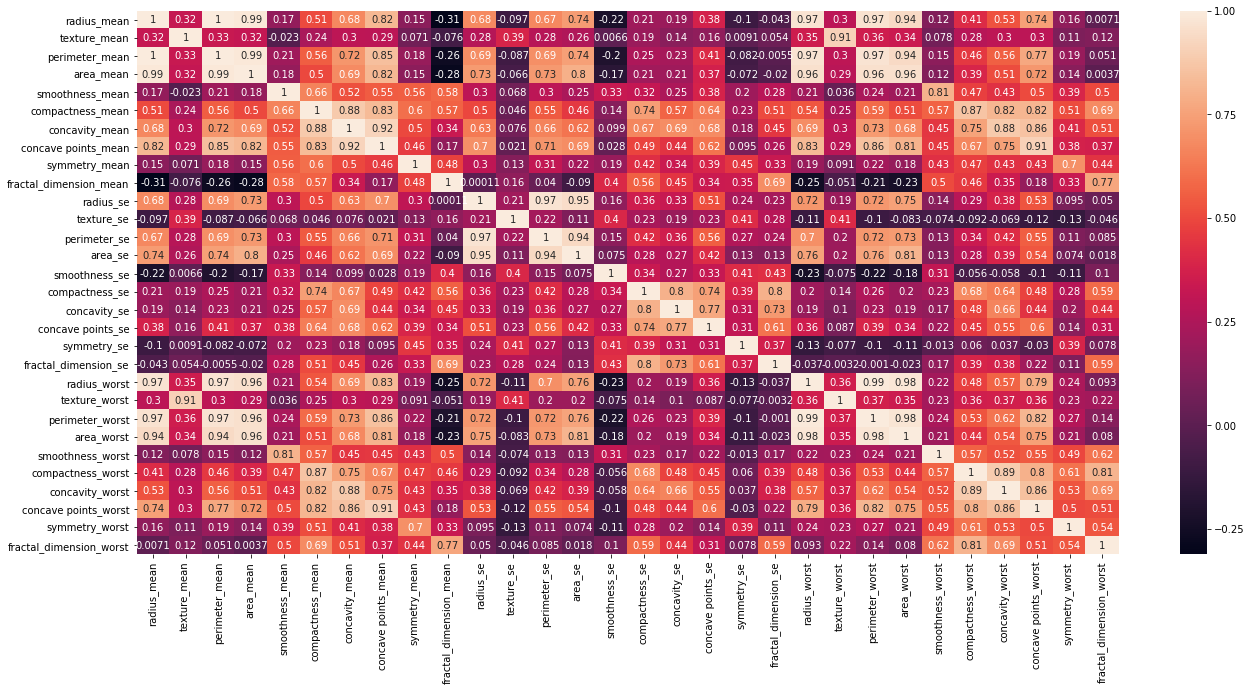

In [117]:
# lets look at the correlation 
corrcol= data.drop('diagnosis',1)
heat=corrcol.corr()

# correlation heatmap
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(22,10))
sns.heatmap(heat,annot=True)


In [118]:
x=data.drop('diagnosis',1)
y=data.diagnosis

#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)



In [119]:
# lets build a model 
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV,KFold
from sklearn.svm import SVC
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=1,test_size=0.25)

# feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

# Build a model 
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(random_state=0)
lg.fit(xtrain,ytrain )
pred=lg.predict(xtest)


D:\Anaconda Nav\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [120]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
confusion_matrix(ytest, pred)
#    N    P  - pred
# N TN   FP
# P FN   TP

array([[87,  1],
       [ 2, 53]], dtype=int64)

In [121]:
accuracy_score(ytest,pred) # how much it has predicted correctly - tp+tn/tp+tn+fp+fn

0.9790209790209791

In [122]:
# recall score - tp/fn+tp - sensitivity - how much correct positives predicted 
recall_score(ytest,pred)

0.9636363636363636

In [123]:
# PRECISION score - tp/tp+fp
precision_score(ytest,pred)

0.9814814814814815

In [124]:
# f1 score 
f1_score(ytest,pred)

0.9724770642201834

In [132]:
# for knn 
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
knn.fit(xtrain,ytrain)
pred=knn.predict(xtest)
print(accuracy_score(ytest,pred))
print(recall_score(ytest,pred))
print(precision_score(ytest,pred))
print(f1_score(ytest,pred))

0.958041958041958
0.8909090909090909
1.0
0.9423076923076923


,k,MSE
4,9,0.028076
1,3,0.032727
2,5,0.032727
3,7,0.032727
5,11,0.035053
7,15,0.037547
8,17,0.042253
6,13,0.044524
0,1,0.044634
9,19,0.046905


<Figure size 432x288 with 0 Axes>

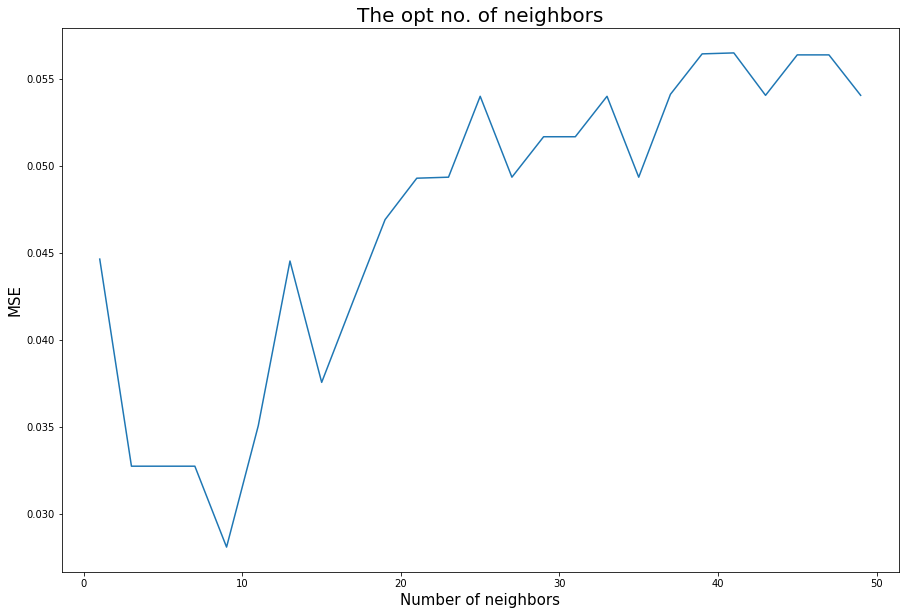

In [131]:
from sklearn.model_selection import cross_val_score
#creating lisf of K for KNN 
k_list=list(range(1,50,2))

#creating list of CV scores 
cv_scores=[]

#perform 10-fold cross validation 
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,xtrain,ytrain,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to miscalculation error 
MSE=[1-x for x in cv_scores]
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The opt no. of neighbors',fontsize=20)
plt.xlabel('Number of neighbors',fontsize=15)
plt.ylabel('MSE',fontsize=15)
plt.plot(k_list,MSE)

# creating a dataset for seeing the minimum error k 
a={'k':k_list,'MSE':MSE}
df=pd.DataFrame(a)
df.sort_values('MSE')

In [126]:
# for svm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(xtrain,ytrain)
pred=svc.predict(xtest)
print(accuracy_score(ytest,pred))
print(recall_score(ytest,pred))
print(precision_score(ytest,pred))
print(f1_score(ytest,pred))

0.965034965034965
0.9454545454545454
0.9629629629629629
0.9541284403669724


In [141]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_leaf_nodes=25)
dt.fit(xtrain,ytrain)
pred=dt.predict(xtest)
print(accuracy_score(ytest,pred))
print(recall_score(ytest,pred))
print(precision_score(ytest,pred))
print(f1_score(ytest,pred))

0.9370629370629371
0.9090909090909091
0.9259259259259259
0.9174311926605504


In [143]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, xtrain, xtest, ytrain, ytest):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(xtrain, ytrain)
    preds_val = model.predict(xtest)
    mae = mean_absolute_error(ytest, preds_val)
    return(mae)

# mae - mean abs error - avg abs value of  (actual - pred)

0.06293706293706294

In [140]:

candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]

# Write loop to find the ideal tree size from candidate_max_leaf_nodes
scores = {leaf_size: get_mae(leaf_size, xtrain, xtest, ytrain, ytest) for leaf_size in candidate_max_leaf_nodes}
best_tree_size = min(scores, key=scores.get)
best_tree_size

25

In [128]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(xtrain,ytrain)
pred=rf.predict(xtest)
print(accuracy_score(ytest,pred))
print(recall_score(ytest,pred))
print(precision_score(ytest,pred))
print(f1_score(ytest,pred))

0.958041958041958
0.9272727272727272
0.9622641509433962
0.9444444444444444


In [155]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
random_grid = {'n_estimators': n_estimators}

In [151]:
rf = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain, ytrain)

D:\Anaconda Nav\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.7s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [153]:
pred=rf_random.predict(xtest)
print(accuracy_score(ytest,pred))
print(recall_score(ytest,pred))
print(precision_score(ytest,pred))
print(f1_score(ytest,pred))

0.958041958041958
0.9272727272727272
0.9622641509433962
0.9444444444444444


In [161]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rf = RandomForestClassifier(random_state=0)
from sklearn.model_selection import GridSearchCV


In [162]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [163]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 200}

In [171]:
rf = RandomForestClassifier(criterion='entropy',max_depth= 5,
 max_features= 'log2',
 n_estimators= 200)
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [172]:
pred=rf.predict(xtest)
print(accuracy_score(ytest,pred))
print(recall_score(ytest,pred))
print(precision_score(ytest,pred))
print(f1_score(ytest,pred))

0.958041958041958
0.9272727272727272
0.9622641509433962
0.9444444444444444
